# Semesterarbeit Teil Py4: Anwendung mit Pandas

## Einleitung

Diese Arbeit konzentriert sich auf die Analyse von zwei Datensätzen der Jelmoli AG. Der erste Datensatz umfasst die Umsätze, die zwischen 2019 und Oktober 2023 mit einer Memberkarte bei der Marke Woolrich erzielt wurden. Ziel des ersten Teils dieser Arbeit ist es, einen umfassenden Überblick über diesen Datensatz zu erhalten und durch sorgfältiges Data Wrangling eine solide Grundlage für die darauf folgende Erstellung diverser Sales-Reports zu legen.

Im zweiten Teil der Arbeit richtet sich der Fokus auf einen weiteren Datensatz, der detaillierte Informationen über die Memberkunden der Jelmoli AG enthält. Durch die Verknüpfung dieses Datensatzes mit den Umsatzdaten wird eine tiefere Analyse ermöglicht, die speziell auf das Alter der Kunden abzielt. Die Absicht ist es, aussagekräftige Reports zu generieren, die den Umsatz pro Generation aufzeigen, wie zum Beispiel für Babyboomer.


## Teil 1

### Datensatz laden und Übersicht verschaffen

In [2]:
# Laden der Packete
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Laden des Datensatzes
data_1 = pd.read_excel("/Users/cristianruiz/Desktop/CAS/Python/Semesterarbeit 3 & 4/Woolrich_Transaktionsdaten_seit2019.xlsx")

# Überprüfen der ersten Zeilen, um die Datenstruktur zu verstehen
data_1.head



<bound method NDFrame.head of           Datum Haushaltsnr.   Kontaktnr.    Kundenkarte         Kundenname  \
0    2019-03-19  H0000011498  P0000289782  2400000000266   Sylvia Harlacher   
1    2020-10-15  H0000000748  P0000000748  2400000010913    Olena Uebelmann   
2    2020-10-15  H0000000748  P0000000748  2400000010913    Olena Uebelmann   
3    2019-03-30  H0000011540  P0000011540  2400000011217         Maja Weber   
4    2019-03-30  H0000011540  P0000011540  2400000011217         Maja Weber   
...         ...          ...          ...            ...                ...   
7212 2023-11-27  H0000010477  P0000010477  2400121158419  Sonja Schaltegger   
7213 2023-11-27  H0000010572  P0000010572  2400000740513     Enisa Sarajlic   
7214 2023-11-27  H0000361991  P0000392534  2400108475949  Deniz La La marra   
7215 2023-11-28  H0000174851  P0000174851  2400198168717    Cyprienne Craig   
7216 2023-11-28  H0000191664  P0000191664  2400199156119     Alfred Kanzler   

                Beleg

Nun möchte ich mir die Spalten "Kundenname",  "Gesamtbetrag", "Abteilung Beschreibung", "Artikeltyp Beschreibung" und "Entstehungszeitpunkt"  genauer anschauen, da ich in einem ersten Schritt insbesondere mit diesen Spalten arbeiten werde um die Sales-Reports zu erstellen.

In [3]:
Übersicht_1 = data_1['Kundenname'].describe()
Übersicht_2 = data_1['Kundenname'].isna().sum()
Übersicht_3 = data_1['Gesamtbetrag'].describe()
Übersicht_4 = data_1['Gesamtbetrag'].isna().sum()
Übersicht_5 = data_1['Abteilung Beschreibung'].describe()
Übersicht_6 = data_1['Abteilung Beschreibung'].isna().sum()
Übersicht_7 = data_1['Artikeltyp Beschreibung'].describe()
Übersicht_8 = data_1['Artikeltyp Beschreibung'].isna().sum()
Übersicht_9 = data_1['Entstehungszeitpunkt'].describe()
Übersicht_10 = data_1['Entstehungszeitpunkt'].isna().sum()

print(f"Kundenname: {Übersicht_1}\n")
print(f"Kundenname NA's: {Übersicht_2}\n")
print(f"Gesamtbetrag: {Übersicht_3}\n")
print(f"Gesamtbetrag NA's: {Übersicht_4}\n")
print(f"Abteilung Beschreibung: {Übersicht_5}\n")
print(f"Abteilung Beschreibung NA's: {Übersicht_6}\n")
print(f"Artikeltyp Beschreibung: {Übersicht_7}\n")
print(f"Artikeltyp Beschreibung NA's: {Übersicht_8}\n")
print(f"Entstehungszeitpunkt: {Übersicht_9}\n")
print(f"Entstehungszeitpunkt NA's: {Übersicht_10}\n")


Kundenname: count            7168
unique           4894
top       Piar Kühnis
freq               26
Name: Kundenname, dtype: object

Kundenname NA's: 49

Gesamtbetrag: count    7217.000000
mean      390.062267
std       405.523800
min     -2380.000000
25%       109.900000
50%       329.900000
75%       709.000000
max      2240.000000
Name: Gesamtbetrag, dtype: float64

Gesamtbetrag NA's: 0

Abteilung Beschreibung: count          7217
unique            5
top       Damenmode
freq           3667
Name: Abteilung Beschreibung, dtype: object

Abteilung Beschreibung NA's: 0

Artikeltyp Beschreibung: count            7217
unique             55
top       Jacken div.
freq             1913
Name: Artikeltyp Beschreibung, dtype: object

Artikeltyp Beschreibung NA's: 0

Entstehungszeitpunkt: count                           7217
unique                          4310
top              2021-01-16 10:00:00
freq                              58
first            2019-01-02 10:00:00
last      2023-11-28 15:34

/var/folders/59/gb7ht7hs6sn_q2jsjkt3042c0000gn/T/ipykernel_61825/3016335918.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Übersicht_9 = data_1['Entstehungszeitpunkt'].describe()


Nach der ersten Übersicht über die Daten habe ich festgestellt, dass folgende Anpassungen notwendig sind, um die Datenqualität für die Analyse zu optimieren:

1. **Entfernen der NA-Werte bei "Kundenname"**: Es ist wichtig, fehlende Werte zu entfernen, um vollständige und aussagekräftige Datensätze zu gewährleisten.
2. **Formatänderung des "Gesamtbetrags"**: Der Gesamtbetrag, aktuell im Float64-Format, wird für eine bessere Lesbarkeit in den Reports in ein formatiertes Format wie "123'000" umgewandelt.
3. **Anpassung des "Entstehungszeitpunkts" und Hinzufügen einer neuen Spalte**: Der "Entstehungszeitpunkt" wird in ein Datumformat umgewandelt, und es wird eine zusätzliche Spalte eingefügt, die Jahr und Monat separat anzeigt. Dies ermöglicht eine detailliertere Darstellung der Umsätze nach Monat und Jahr in den nachfolgenden Reports.

Diese Anpassungen werden im nächsten Abschnitt meiner Arbeit, dem "Data Wrangling", durchgeführt.


### Datawrangling

1. Entfernen der NA Werte

In [4]:
# Entfernen von Zeilen mit NA-Werten in der Spalte "Kundenname"
data_1_ohne_nas = data_1.dropna(subset=['Kundenname'])

#prüfen ob NA-Werte entfernt wurden
data_1_ohne_nas['Kundenname'].isna().sum()

0

2. Gesamtbetrag in Format "123'000" umwandeln

In [5]:
# Format ändern
data_1_ohne_nas.loc[:, 'Gesamtbetrag_formatiert'] = data_1_ohne_nas['Gesamtbetrag'].apply(lambda x: f"{x:,.0f}")

# Überprüfen Sie die ersten Zeilen des DataFrames, um sicherzustellen, dass die Umwandlung erfolgt ist
data_1_ohne_nas[['Gesamtbetrag', 'Gesamtbetrag_formatiert']].head()


/var/folders/59/gb7ht7hs6sn_q2jsjkt3042c0000gn/T/ipykernel_61825/1502738431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_ohne_nas.loc[:, 'Gesamtbetrag_formatiert'] = data_1_ohne_nas['Gesamtbetrag'].apply(lambda x: f"{x:,.0f}")


,Gesamtbetrag,Gesamtbetrag_formatiert
0,142.40,142
1,191.17,191
2,152.93,153
3,839.90,840
4,419.90,420


3. Entstehungszeitpunkt als Datumforamt anpassen und eine zusätzliche Spalte mit Jahr und Monat einfügen.

In [6]:

# Konvertieren der Spalte "Entstehungszeitpunkt" in den Datentyp Datum
data_1_ohne_nas['Entstehungszeitpunkt'] = pd.to_datetime(data_1_ohne_nas['Entstehungszeitpunkt'])

# Erstellen einer zusätzlichen Spalte "Jahr" mit dem Jahr aus "Entstehungszeitpunkt"
data_1_ohne_nas['Jahr'] = data_1_ohne_nas['Entstehungszeitpunkt'].dt.year

# Erstellen einer weiteren zusätzlichen Spalte "Jahr_Monat" mit Jahr und Monat aus "Entstehungszeitpunkt"
data_1_ohne_nas['Jahr_Monat'] = data_1_ohne_nas['Entstehungszeitpunkt'].dt.strftime('%Y-%m')

# Überprüfung der ersten Zeilen des DataFrames, um sicherzustellen, dass die Änderungen erfolgt sind
data_1_ohne_nas[['Entstehungszeitpunkt', 'Jahr', 'Jahr_Monat']].head()



/var/folders/59/gb7ht7hs6sn_q2jsjkt3042c0000gn/T/ipykernel_61825/3221529746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_ohne_nas['Entstehungszeitpunkt'] = pd.to_datetime(data_1_ohne_nas['Entstehungszeitpunkt'])
/var/folders/59/gb7ht7hs6sn_q2jsjkt3042c0000gn/T/ipykernel_61825/3221529746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_ohne_nas['Jahr'] = data_1_ohne_nas['Entstehungszeitpunkt'].dt.year
/var/folders/59/gb7ht7hs6sn_q2jsjkt3042c0000gn/T/ipykernel_61825/3221529746.py:8: Se

,Entstehungszeitpunkt,Jahr,Jahr_Monat
0,2019-03-19 10:00:00,2019,2019-03
1,2020-10-15 10:00:00,2020,2020-10
2,2020-10-15 10:00:00,2020,2020-10
3,2019-03-30 10:00:00,2019,2019-03
4,2019-03-30 10:00:00,2019,2019-03


### Erstellung der ersten Sales-Reports

1. Balkendiagramm Umsatz vom Gesamtjahr 2022 aufgeteilt nach Monaten

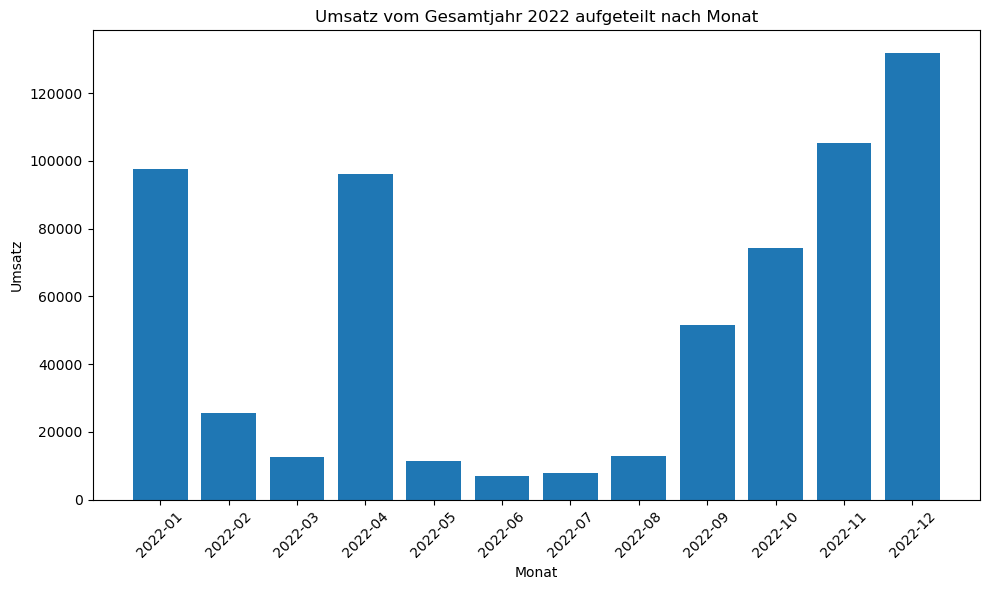

In [7]:
import matplotlib.pyplot as plt

# Filtern der Daten für das Jahr 2022
umsatz_2022 = data_1_ohne_nas[data_1_ohne_nas['Jahr'] == 2022]

# Gruppieren der Daten nach Monat und aggregieren des Umsatzes
umsatz_monat_2022 = umsatz_2022.groupby(umsatz_2022['Entstehungszeitpunkt'].dt.strftime('%Y-%m'))['Gesamtbetrag'].sum().reset_index()

# Umbenennen der Saplten
umsatz_monat_2022.columns = ['Jahr_Monat', 'Umsatz']

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(umsatz_monat_2022['Jahr_Monat'], umsatz_monat_2022['Umsatz'])
plt.xlabel('Monat')
plt.ylabel('Umsatz')
plt.title('Umsatz vom Gesamtjahr 2022 aufgeteilt nach Monat')
plt.xticks(rotation=45)
plt.tight_layout()

# Zeigen des Balkendiagramms
plt.show()


2. Balkendiagramm Umsatz und Anteil in % nach Abteilung Gesamtjahr 2022

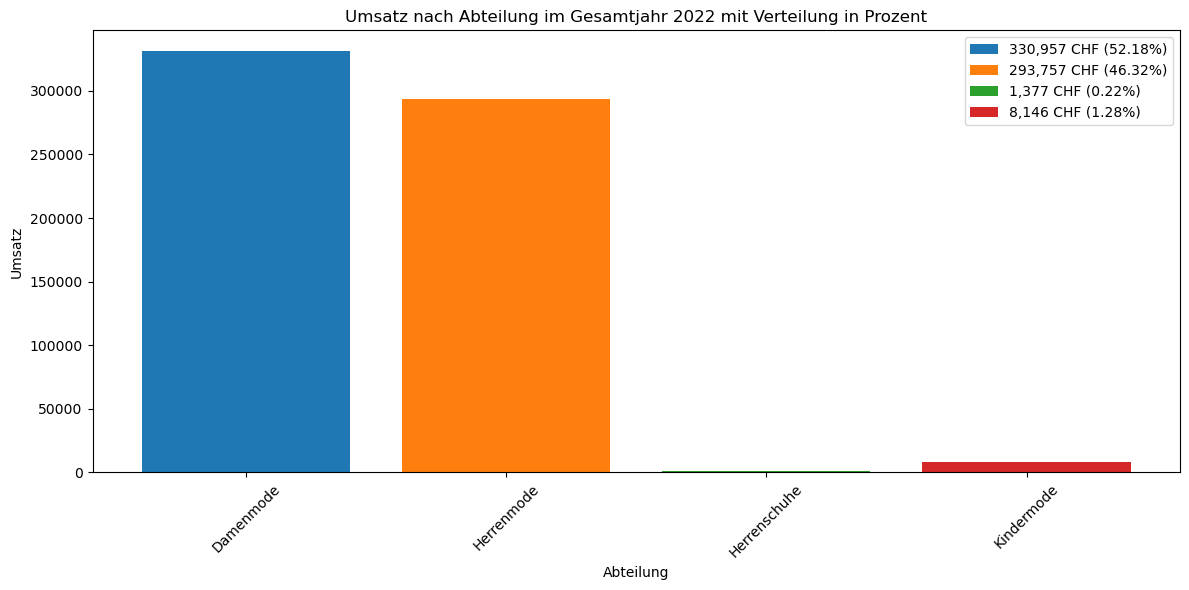

In [15]:
# Filtern der Daten für das Jahr 2022
umsatz_2022 = data_1_ohne_nas[data_1_ohne_nas['Jahr'] == 2022]

# Gesamtumsatz für das Jahr 2022 berechnen
gesamtumsatz_2022 = umsatz_2022['Gesamtbetrag'].sum()

# Gruppieren der Daten nach Abteilung und aggregieren des Umsatzes
umsatz_abteilung_2022 = umsatz_2022.groupby('Abteilung Beschreibung')['Gesamtbetrag'].sum().reset_index()

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))

# Erstellen von Balken für den Umsatz und einfügen der Verteilung in Prozent in den Balken
for index, row in umsatz_abteilung_2022.iterrows():
    umsatz_formatiert = f"{row['Gesamtbetrag']:,.0f}"  # Formatierung des Umsatzes mit Tausendertrennzeichen
    prozent_formatiert = f"({row['Gesamtbetrag']/gesamtumsatz_2022*100:.2f}%)"
    label_text = f'{umsatz_formatiert} CHF {prozent_formatiert}'
    plt.bar(row['Abteilung Beschreibung'], row['Gesamtbetrag'], label=label_text)

plt.xlabel('Abteilung')
plt.ylabel('Umsatz')
plt.title('Umsatz nach Abteilung im Gesamtjahr 2022 mit Verteilung in Prozent')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Zeigen Sie das Balkendiagramm an
plt.show()

## Teil 2: Vereinigung von Datensätzen für weitere Sales-Reports

### Laden der neuen Daten und mit erstem Datensatz kombinieren


In [17]:
# Laden des neuen Datensatzes
data_neu = pd.read_excel("/Users/cristianruiz/Desktop/CAS/Python/Semesterarbeit 3 & 4/Woolrich_KundInnen.xlsx")

# Vereinigung der beiden Datensätze basierend auf der Spalte "Kontaktnr."
# Verwendung von how='left', um den vorhandenen Datensatz führend zu lassen
vereinigter_datensatz = pd.merge(data_1_ohne_nas, data_neu, on='Kontaktnr.', how='left')

# Überprüfung des vereinigten Datensatzes
print(vereinigter_datensatz.head())

       Datum Haushaltsnr.   Kontaktnr.    Kundenkarte        Kundenname  \
0 2019-03-19  H0000011498  P0000289782  2400000000266  Sylvia Harlacher   
1 2020-10-15  H0000000748  P0000000748  2400000010913   Olena Uebelmann   
2 2020-10-15  H0000000748  P0000000748  2400000010913   Olena Uebelmann   
3 2019-03-30  H0000011540  P0000011540  2400000011217        Maja Weber   
4 2019-03-30  H0000011540  P0000011540  2400000011217        Maja Weber   

  Belegnr.  Menge Zeilenart  Zeilenrabatt % Markenbeschreibung  ...  \
0  2519722      1   Verkauf       25.013165           Woolrich  ...   
1  2523488      1   Verkauf       36.255418           Woolrich  ...   
2  2523489      1   Verkauf       36.252605           Woolrich  ...   
3  2525012      1   Verkauf        0.000000           Woolrich  ...   
4  2525415      1   Verkauf        0.000000           Woolrich  ...   

   Gesamtbetrag_formatiert  Jahr Jahr_Monat  Vorname   Nachname Postleitzahl  \
0                      142  2019    2019-0

## Datensatz bearbeiten und mit Generationen befüllen

Nachstehend werden zwei neue Spalten kreiert. Als erstes wird eine Spalte mit dem Alter, anhand des Geburtstages erstellt. Danach wird eine weitere spalte erstellt, welche mit dem Beschreib der Generationen anhand des Alters befüllt wird.

In [18]:
# Konvertieren der Spalte mit dem Geburtsdatum in Datetime
vereinigter_datensatz['Geburtsdatum'] = pd.to_datetime(vereinigter_datensatz['Geburtsdatum'], errors='coerce')  
aktuelles_jahr = pd.Timestamp.now().year
vereinigter_datensatz['Alter'] = aktuelles_jahr - vereinigter_datensatz['Geburtsdatum'].dt.year # Berechnung des Alters

# Funktion zur Zuweisung der Generation basierend auf dem Alter
def generation_basierend_auf_alter(alter):
    if 0 <= alter <= 24:
        return 'Generation Z'
    elif 25 <= alter <= 40:
        return 'Millennials'
    elif 41 <= alter <= 56:
        return 'Generation X'
    elif 57 <= alter <= 75:
        return 'Babyboomers'
    elif alter >= 76:
        return 'Silent Gen'
    else:
        return 'unknown'

# Neue Spalte "Generation" erstellen und basierend auf dem Alter befüllen
vereinigter_datensatz['Generation'] = vereinigter_datensatz['Alter'].apply(generation_basierend_auf_alter)

# Überprüfen des aktualisierten Datensatzes mit der neuen Spalte "Generation"
print(vereinigter_datensatz[['Kontaktnr.', 'Alter', 'Generation']].head())

    Kontaktnr.  Alter    Generation
0  P0000289782   73.0   Babyboomers
1  P0000000748   54.0  Generation X
2  P0000000748   54.0  Generation X
3  P0000011540   86.0    Silent Gen
4  P0000011540   86.0    Silent Gen


### Erstellung der Sales-Reports nach Generation

1. Total Umsatz pro Generation für das Jahr 2022

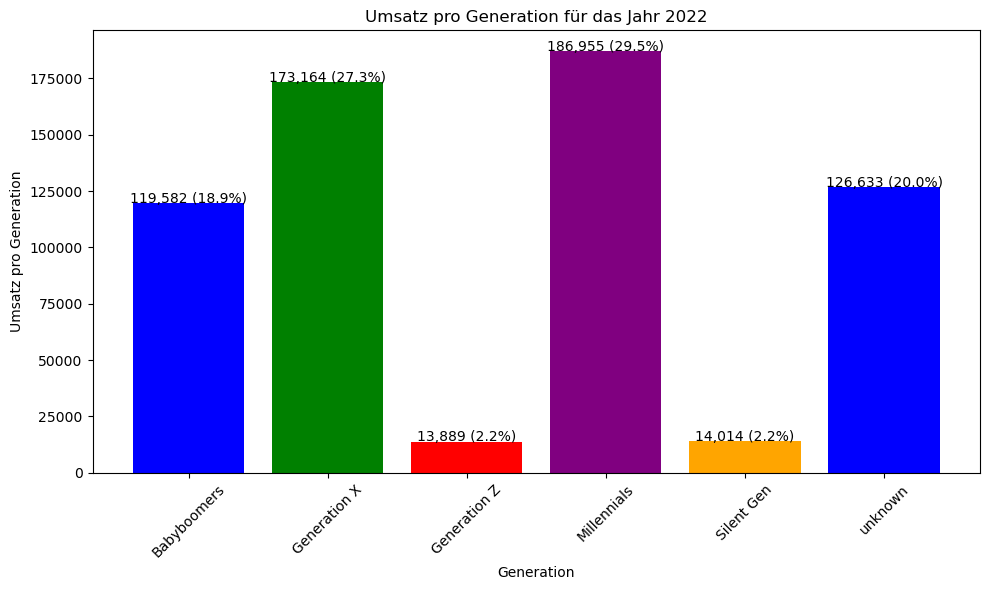

In [19]:
# Filtern des Datensatzes, um nur Daten für das Jahr 2022 zu erhalten
daten_2022 = vereinigter_datensatz[vereinigter_datensatz['Entstehungszeitpunkt'].dt.year == 2022]

# Gruppieren des Datensatzes nach der "Generation" und berechnen des Gesamtumsatzes für jede Generation
umsatz_pro_generation = daten_2022.groupby('Generation')['Gesamtbetrag'].sum().reset_index()

# Formatieren des Umsatzes in "123'000"-Format
umsatz_pro_generation['Umsatz_formatiert'] = umsatz_pro_generation['Gesamtbetrag'].apply(lambda x: f"{x:,.0f}")

# Berechnung des prozentualen Anteils
umsatz_pro_generation['Prozentualer Anteil'] = (umsatz_pro_generation['Gesamtbetrag'] / umsatz_pro_generation['Gesamtbetrag'].sum()) * 100

# Erstellung des Balkendiagramms
plt.figure(figsize=(10, 6))
bars = plt.bar(umsatz_pro_generation['Generation'], umsatz_pro_generation['Gesamtbetrag'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Generation')
plt.ylabel('Umsatz pro Generation')
plt.title('Umsatz pro Generation für das Jahr 2022')

# Erstellung der Legende mit Umsatz pro Generation und prozentualem Anteil
for bar, umsatz, prozent in zip(bars, umsatz_pro_generation['Umsatz_formatiert'], umsatz_pro_generation['Prozentualer Anteil']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 2000  # Hier die Höhe anpassen
    plt.text(text_x, text_y, f"{umsatz} ({prozent:.1f}%)", ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()

# Anzeigen des Balkendiagramms
plt.show()



2. Umsatz pro Generation für die Abteilung Damenmode und das Jahr 2022

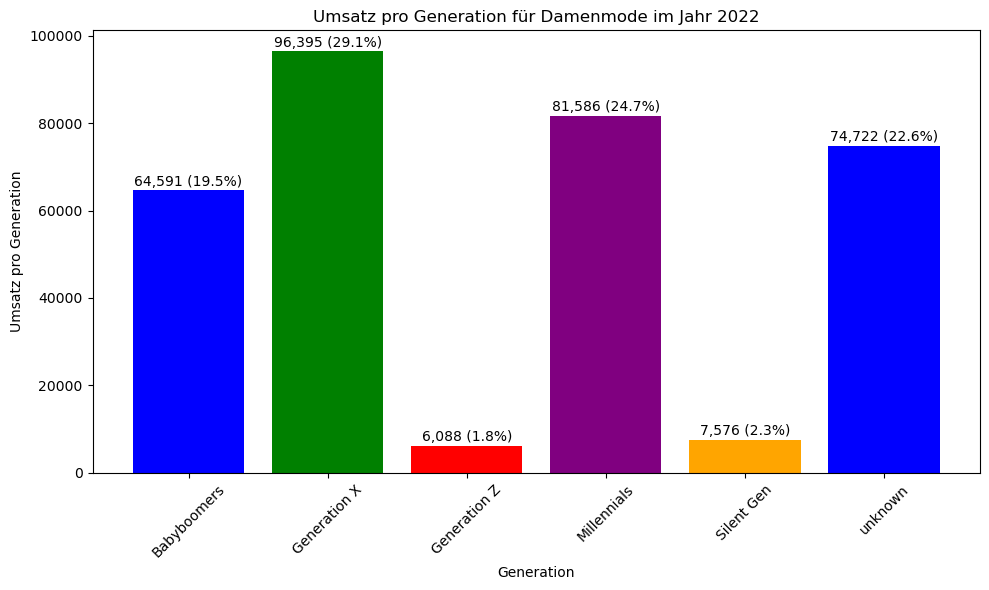

In [20]:
# Filtern des Datensatzes für das Jahr 2022 und die Abteilung Damenmode
daten_2022_damenmode = vereinigter_datensatz[(vereinigter_datensatz['Entstehungszeitpunkt'].dt.year == 2022) & (vereinigter_datensatz['Abteilung Beschreibung'] == 'Damenmode')]

# Gruppieren der Daten nach der "Generation" und berechnen des Gesamtumsatzes für jede Generation
umsatz_pro_generation_damenmode = daten_2022_damenmode.groupby('Generation')['Gesamtbetrag'].sum().reset_index()

# Formatierung des Umsatzes in "123'000"-Format
umsatz_pro_generation_damenmode['Umsatz_formatiert'] = umsatz_pro_generation_damenmode['Gesamtbetrag'].apply(lambda x: f"{x:,.0f}")

# Berechnen des prozentualen Anteils
umsatz_pro_generation_damenmode['Prozentualer Anteil'] = (umsatz_pro_generation_damenmode['Gesamtbetrag'] / umsatz_pro_generation_damenmode['Gesamtbetrag'].sum()) * 100

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
bars = plt.bar(umsatz_pro_generation_damenmode['Generation'], umsatz_pro_generation_damenmode['Gesamtbetrag'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Generation')
plt.ylabel('Umsatz pro Generation')
plt.title('Umsatz pro Generation für Damenmode im Jahr 2022')

# Erstellen der Legende mit Umsatz pro Generation und prozentualem Anteil
for bar, umsatz, prozent in zip(bars, umsatz_pro_generation_damenmode['Umsatz_formatiert'], umsatz_pro_generation_damenmode['Prozentualer Anteil']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 2000  # Hier die Höhe anpassen
    plt.text(text_x, text_y, f"{umsatz} ({prozent:.1f}%)", ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()

# Anzeigen des Balkendiagramms
plt.show()


3. Umsatz pro Generation für die Abteilung Herrenmode und das Jahr 2022

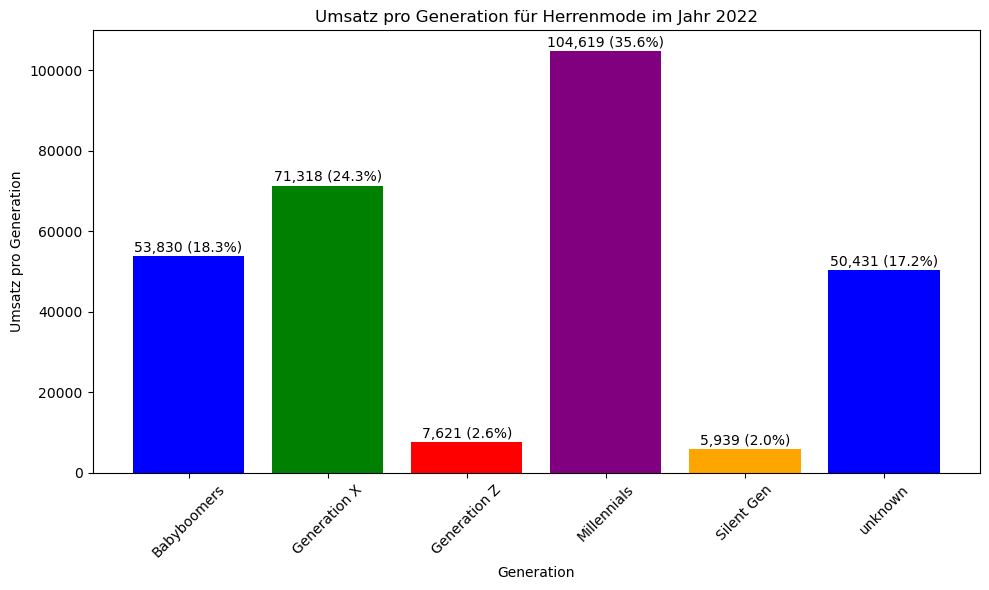

In [21]:
# Filtern des Datensatzes für das Jahr 2022 und die Abteilung Herrenmode
daten_2022_herrenmode = vereinigter_datensatz[(vereinigter_datensatz['Entstehungszeitpunkt'].dt.year == 2022) & (vereinigter_datensatz['Abteilung Beschreibung'] == 'Herrenmode')]

# Gruppieren der Daten nach der "Generation" und berechnen des Gesamtumsatzes für jede Generation
umsatz_pro_generation_herrenmode = daten_2022_herrenmode.groupby('Generation')['Gesamtbetrag'].sum().reset_index()

# Formatieren des Umsatz in "123'000"-Format
umsatz_pro_generation_herrenmode['Umsatz_formatiert'] = umsatz_pro_generation_herrenmode['Gesamtbetrag'].apply(lambda x: f"{x:,.0f}")

# Berechnen des prozentualen Anteils
umsatz_pro_generation_herrenmode['Prozentualer Anteil'] = (umsatz_pro_generation_herrenmode['Gesamtbetrag'] / umsatz_pro_generation_herrenmode['Gesamtbetrag'].sum()) * 100

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
bars = plt.bar(umsatz_pro_generation_herrenmode['Generation'], umsatz_pro_generation_herrenmode['Gesamtbetrag'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Generation')
plt.ylabel('Umsatz pro Generation')
plt.title('Umsatz pro Generation für Herrenmode im Jahr 2022')

# Erstellen der Legende mit Umsatz pro Generation und prozentualem Anteil
for bar, umsatz, prozent in zip(bars, umsatz_pro_generation_herrenmode['Umsatz_formatiert'], umsatz_pro_generation_herrenmode['Prozentualer Anteil']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 2000  # Hier die Höhe anpassen
    plt.text(text_x, text_y, f"{umsatz} ({prozent:.1f}%)", ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()

# Anzeigen des Balkendiagramms
plt.show()


## Fazit

Diese Arbeit hat eine umfassende Analyse der Umsatzdaten der Jelmoli AG durchgeführt, wobei ein besonderer Fokus auf Transaktionen der Marke Woolrich im Zeitraum von 2019 bis Oktober 2023 lag. Durch gründliches Data Wrangling und die detaillierte Betrachtung von Schlüsselspalten wie "Kundenname", "Gesamtbetrag", "Abteilung Beschreibung", "Artikeltyp Beschreibung" und "Entstehungszeitpunkt" konnten wir tiefe Einblicke in das Kaufverhalten der Kunden und Umsatztrends gewinnen.

Ein entscheidender Schritt in der Analyse war die Kombination der Umsatzdaten mit einem zweiten Datensatz, der detaillierte Informationen über die Memberkunden enthält. Diese Verknüpfung ermöglichte es, den Umsatz nicht nur nach konventionellen Kategorien wie Monaten und Abteilungen, sondern auch nach dem Alter der Kunden zu analysieren. Dadurch konnten wir untersuchen, wie verschiedene Generationen, wie z.B. Babyboomer, zum Gesamtumsatz beitragen und welche Präferenzen sie zeigen.

Die Anpassungen und Formatierungen der Daten sowie die erweiterte Analyse nach Generationen ermöglichten es, aussagekräftige und facettenreiche Sales-Reports zu erstellen. Diese Reports bieten nicht nur einen Überblick über die allgemeinen Umsatztrends, sondern auch spezifische Einblicke in die Kundenstruktur und das Verhalten unterschiedlicher Altersgruppen.

